In [7]:
"""
Estudiantes:
Derek Rojas Mendoza - 604740973
Diego Quirós Artiñano - 901150322
David Coto Solano - 305440064
EIF 203 I-2022 Grupo 10am
NRC 41712
"""

def fuerza_bruta_instrumentado(texto, patron):
    operaciones = 0
    n = len(texto)
    m = len(patron)
    indexList = []
    i = 0
    
    while i < n-m +1 :
        j = 0
        while j < m:
            operaciones += 1 # el != de abajo
            if texto[i + j] != patron[j]:
                break
            j += 1
        if j == m:
            indexList += [i]
        i += 1
    return operaciones

In [8]:
def KMPSearch_instrumentado(txt, pat):
    cont = 0    #instrumentacion
    n = len(txt)
    m = len(pat)
    listOfIndex = []
    lps = [0]*m
    # cont += 1 #construccion de lps

    # procesamiento
    longitud = 0 # longitud del sufijo del prefijo mas largo
    x = 1
    while x < m:
        if pat[x] == pat[longitud]:
            cont += 1 #construccion de lps
            longitud += 1
            lps[x] = longitud
            x += 1
        else:
            if longitud != 0:
                longitud = lps[longitud-1]
            else:
                cont += 1 #construccion de lps
                lps[x] = 0
                x += 1
    j = 0
    i = 0
    #Searching
    while i < n:
        cont += 1 # == del primer if
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == m:
            listOfIndex += [i - j]
            j = lps[j-1]
        elif i < n and pat[j] != txt[i]:
            cont += 1 # '!=' del elif (Comparacion entre patron y texto)
            if j != 0:
                j = lps[j-1]
            else:
                i += 1
    return cont

In [9]:
ALPHABET_SIZE = 256

def bm_instrumentado(pat, txt):
    sizeP = len(pat)
    sizeT = len(txt)
    ocurrences = []
    cont = 0
    if sizeP + ALPHABET_SIZE < (sizeP *(sizeP + 1))/2: # los posible O-grandes para solo tener que generar una tabla el el preprocesamiento, dado a que el algoritmo usa una o la otra
        # --- 1. BAD CHARACTER TABLE ---
        bcT = []
        # This part is changed on the instrumentation section. Here we use List Comprehension.
        bcT = []
        for i in range(ALPHABET_SIZE):
            cont += 1
            bcT.append(sizeP)
        for j in range(sizeP):
            cont += 1
            bcT[ord(pat[j])] = sizeP - j
    else:   
        # --- 0. SUFFIXES TABLE ---
        suff = [0 for i in range(sizeP)]
        suff[sizeP-1] = sizeP
        g = sizeP - 1
        f = 0
        for i in range(sizeP-2, -1, -1):
            cont += 1
            if i > g and suff[i + sizeP - 1 - f] < i-g:
                suff[i] = suff[i + sizeP - 1 - f]
            else:
                if i < g:
                    g = i
                f = i
                while g >= 0 and pat[g] == pat[g + sizeP - 1 - f]:
                    # cont += 1
                    g -= 1
                suff[i] = f-g
        # --- 2. GOOD SUFFIX TABLE ---
        gsT = []
        gsT = [sizeP for i in range(sizeP)]
        for i in range(sizeP-1, -1, -1):
            cont += 1
            if suff[i] == i+1:
                for j in range(0, sizeP-1-i):
                    cont += 1
                    if gsT[j] == sizeP:
                        gsT[j] = sizeP - 1 - i
        for i in range(0, sizeP-1):
            cont += 1
            gsT[sizeP-1-suff[i]] = sizeP - 1 - i
        usesTable1 = False
    # --- 3. SEARCH STAGE ---
    for i in range(0, sizeT-sizeP+1):
        submatch = 0
        for j in range(sizeP-1, -1, -1):
            cont += 1
            if(pat[j] != txt[i+j]):
                break
            submatch += 1
        if submatch == sizeP:
            ocurrences.append(f"Ocurrence at index {i}!")
        else:
            if usesTable1: i += bcT[ord(txt[i+j])]
            else: gsT[j]
    return cont

In [10]:
def rabin_karp_instrumentado(pat, txt):
    n = len(pat)
    m = len(txt)
    d = 256
    q = 33554393
    h = (d**(n-1)) % q
    hashPatVal = 0
    hashTxtWinVal = 0
    indexList = []
    cont = 0 # de la instrumentacion

    for i in range(n):
        cont += 1
        hashPatVal = (d*hashPatVal + ord(pat[i])) % q
        hashTxtWinVal = (d*hashTxtWinVal + ord(txt[i])) % q
    
    j = 0
    for i in range(m-n+1):
        cont += 1 # por el == de abajo
        if hashPatVal == hashTxtWinVal:
            for j in range(n):
                cont += 1 # por el != de abajo
                if pat[j] != txt[i+j]:
                    break
                else: j += 1
            # esto solo esta verificando que llego hasta abajo no comparando caracteres o hashes
            if j == n:
                indexList += [i]
        if i < m-n:
            cont += 1
            hashTxtWinVal = (d * (hashTxtWinVal - ord(txt[i]) * h) + ord(txt[i + n])) % q
            if hashTxtWinVal < 0:
                hashTxtWinVal += q
    return cont

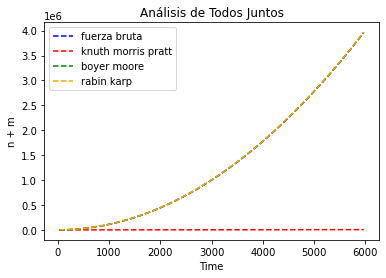

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def test_todos_instrumentado(start, end, inc):
    graph = []
    graph.append([])
    graph.append([])
    graph.append([])
    graph.append([])
    graph.append([])
    for i in range(start, end, inc):
        a = "aa" * i
        b = "a" * i
        graph[0] += [len(a) + len(b)]
        graph[1] += [fuerza_bruta_instrumentado(a, b)]
        graph[2] += [KMPSearch_instrumentado(a, b)]
        graph[3] += [bm_instrumentado(b, a)]
        graph[4] += [rabin_karp_instrumentado(b, a)]
    return graph

g = test_todos_instrumentado(10, 2000, 10)
# plt.plot(g[0], g[0], color="red", label="identidad", linewidth=2.0)
plt.plot(g[0], g[1],  "--", color="blue", label="fuerza bruta") 
plt.plot(g[0], g[2], "--", color="red", label="knuth morris pratt")
plt.plot(g[0], g[3], "--", color="green", label="boyer moore")
plt.plot(g[0], g[4], "--", color="orange", label="rabin karp")
plt.legend()
plt.xlabel('Time')
plt.ylabel("n + m")
plt.title("Análisis de Todos Juntos")
plt.show()